In [19]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Do directors have an impact on success(nbox)?
#### Do actors have an impact on success(nbox)?

In [2]:
wikidata = pd.read_json('movies/data/wikidata-movies2.json.gz', orient='records', lines=True)
actors = pd.read_json('movies/data/actors.json.gz', orient='records', lines=True)
directors = pd.read_json('movies/data/directors.json.gz', orient='records', lines=True)

In [3]:
wikidata = wikidata[pd.notnull(wikidata['nbox'])]
#df = df[pd.notnull(df['made_profit'])]

In [4]:
# explode wikidata director
wikidata_d_stack = wikidata['director'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame()
wikidata_d_stack.columns = ['wikidata_id']
# explode wikidata actors
wikidata_a_stack = wikidata['cast_member'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame()
wikidata_a_stack.columns = ['wikidata_id']

In [5]:
wikidata_d = wikidata_d_stack.reset_index().merge(directors, how="left", on="wikidata_id").set_index('index')
wikidata_a = wikidata_a_stack.reset_index().merge(actors, how="left", on="wikidata_id").set_index('index')

In [6]:
wikidata_d = pd.merge(wikidata_d, wikidata, left_index=True, right_index=True).reset_index()
wikidata_a = pd.merge(wikidata_a, wikidata, left_index=True, right_index=True).reset_index()
#df_genre = pd.merge(df_genre, df, left_index=True, right_index=True).reset_index()

In [7]:
group_d = wikidata_d.groupby(by='director_label')['nbox'].mean().values
group_a = wikidata_a.groupby(by='actor_label')['nbox'].mean().values

1.8214146528345319e-94

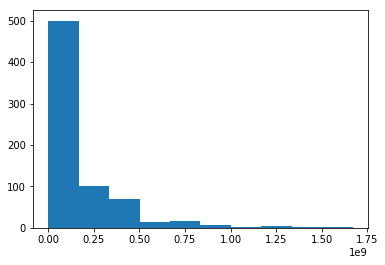

In [8]:
group_d_squared = (group_d ** 2)
plt.hist(group_d)
stats.normaltest(group_d).pvalue

0.0

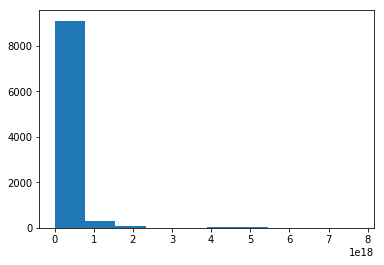

In [9]:
group_a_squared = (group_a ** 2)
plt.hist(group_a_squared)
stats.normaltest(group_a_squared).pvalue

In [10]:
print(stats.mannwhitneyu(group_a, group_d).pvalue)

1.3271165353901276e-18


#### AVONA test on directors and nbox

In [11]:
groups = wikidata_d.groupby('director_label').groups

In [12]:
# get n box values for each actor
array = []
for value in groups.values():
    array.append(wikidata_d['nbox'].iloc[value])

In [13]:
anova_d = stats.f_oneway(*array)


In [14]:
anova_d.pvalue
# 7.94 e-05 => there is a difference in means of the actors

7.947026173570023e-05

#### AVONA with actors

In [15]:
groups_actor = wikidata_a.groupby('actor_label').groups

In [16]:
# get n box values for each actor
array = []
for value in groups.values():
    array.append(wikidata_a['nbox'].iloc[value])

In [17]:
anova_a = stats.f_oneway(*array)

In [18]:
anova_a.pvalue
# 0.33 => cannot conclude actors makes a difference in nBox

0.33404849215546156